Media & Technology : YouTube Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\HP\Downloads\Finlatics\DsResearch\Media_and_Technology\Media_and_Technology\Global_YouTube_Statistics.csv"
                 , encoding = 'latin1')

# Why Use latin1?

# Avoiding Errors: If the CSV file contains characters that are not part of the utf-8 encoding (which is the default for 
# pandas.read_csv), you'll encounter a UnicodeDecodeError. Specifying encoding='latin1' can help avoid this error if the file 
# is encoded in latin1 or a similar encoding.

# Compatibility: Some CSV files created on older systems or exported from certain software might use latin1 encoding. By 
# specifying encoding='latin1', you ensure that such files are read correctly.


# When to Use Other Encodings?

# UTF-8: Use utf-8 for files containing a wide range of characters from various languages. 
# It is the most common encoding for modern applications.

# ISO-8859-1 or CP1252: These are similar to latin1 and may be used if you encounter encoding issues. 
# They are also Western European encodings but can differ slightly in character mappings.

# Other Encodings: Depending on the source of your data, you might need to use other encodings like utf-16, 
# cp1251 (Cyrillic), etc.

In [3]:
df.drop_duplicates(inplace=True)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print(df)

     rank                                           Youtuber  subscribers  \
0       1                                           T-Series  245000000.0   
1       2                                     YouTube Movies  170000000.0   
2       3                                            MrBeast  166000000.0   
3       4                         Cocomelon - Nursery Rhymes  162000000.0   
4       5                                          SET India  159000000.0   
5       6                                              Music  119000000.0   
6       7                                ýýý Kids Diana Show  112000000.0   
7       8                                          PewDiePie  111000000.0   
8       9                                        Like Nastya  106000000.0   
9      10                                      Vlad and Niki   98900000.0   
10     11                                  Zee Music Company   96700000.0   
11     12                                                WWE   96000000.0   

In [4]:
print(df.head(10))

   rank                    Youtuber  subscribers   video views  \
0     1                    T-Series  245000000.0  2.280000e+11   
1     2              YouTube Movies  170000000.0  0.000000e+00   
2     3                     MrBeast  166000000.0  2.836884e+10   
3     4  Cocomelon - Nursery Rhymes  162000000.0  1.640000e+11   
4     5                   SET India  159000000.0  1.480000e+11   
5     6                       Music  119000000.0  0.000000e+00   
6     7         ýýý Kids Diana Show  112000000.0  9.324704e+10   
7     8                   PewDiePie  111000000.0  2.905804e+10   
8     9                 Like Nastya  106000000.0  9.047906e+10   
9    10               Vlad and Niki   98900000.0  7.718017e+10   

           category                       Title  uploads Country of origin  \
0             Music                    T-Series    20082             India   
1  Film & Animation               youtubemovies        1     United States   
2     Entertainment                    

In [5]:
# Q1.	What are the top 10 YouTube channels based on the number of subscribers?


print(df['Youtuber'].head(10))

0                      T-Series
1                YouTube Movies
2                       MrBeast
3    Cocomelon - Nursery Rhymes
4                     SET India
5                         Music
6           ýýý Kids Diana Show
7                     PewDiePie
8                   Like Nastya
9                 Vlad and Niki
Name: Youtuber, dtype: object


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 995 entries, 0 to 994
Data columns (total 29 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              992 non-null    float64
 3   video views                              995 non-null    float64
 4   category                                 942 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country of origin                        873 non-null    object 
 8   Country                                  873 non-null    object 
 9   Abbreviation                             873 non-null    object 
 10  channel_type                             965 non-null  

In [7]:
#print(df.describe())

In [8]:
print(df.isnull().sum())

rank                                         0
Youtuber                                     0
subscribers                                  3
video views                                  0
category                                    53
Title                                        0
uploads                                      0
Country of origin                          122
Country                                    122
Abbreviation                               122
channel_type                                30
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               337
created_year                                 5
created_month

In [9]:
# we can see from above info that there are 3 rows with their subscribers count missing
# so we will drop those three rows as it wouldn't largely impact our analysis

df.dropna(subset=['subscribers'], inplace=True)
print(df.isnull().sum())

rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                    53
Title                                        0
uploads                                      0
Country of origin                          122
Country                                    122
Abbreviation                               122
channel_type                                30
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               336
created_year                                 5
created_month

In [10]:
# Category column (categorical in nature) has 55 rows with missing values
# we need to use mode imputation to fill the 55 rows of missing values
df['category'] = df['category'].fillna(df['category'].mode()[0])
print(df.isnull().sum())

rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                     0
Title                                        0
uploads                                      0
Country of origin                          122
Country                                    122
Abbreviation                               122
channel_type                                30
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               336
created_year                                 5
created_month

In [11]:
# Q2.Which category has the highest average number of subscribers?

# grouping based on category and then finding the mean for each category
grouped = df.groupby('category')
avg_sub = grouped['subscribers'].mean()

print(avg_sub)

# The idxmax() method in pandas is used to return the index (or label) of the first occurrence of the maximum value in a Series.
print(avg_sub.idxmax())
print(avg_sub.max())

category
Autos & Vehicles         1.785000e+07
Comedy                   2.012319e+07
Education                2.654222e+07
Entertainment            2.226034e+07
Film & Animation         2.762727e+07
Gaming                   2.094301e+07
Howto & Style            1.951282e+07
Movies                   2.565000e+07
Music                    2.577363e+07
News & Politics          2.063077e+07
Nonprofits & Activism    2.775000e+07
People & Blogs           2.053130e+07
Pets & Animals           1.810000e+07
Science & Technology     1.861765e+07
Shows                    4.161538e+07
Sports                   2.710909e+07
Trailers                 3.900000e+07
Travel & Events          1.250000e+07
Name: subscribers, dtype: float64
Shows
41615384.615384616


In [12]:
# Q3.	How many videos, on average, are uploaded by YouTube channels in each category?

avg_upload = grouped['uploads'].mean()
print(avg_upload)

category
Autos & Vehicles           1898.500000
Comedy                     1119.753623
Education                  3142.866667
Entertainment             10037.889655
Film & Animation           2899.340909
Gaming                     4226.258065
Howto & Style              1700.794872
Movies                     3553.000000
Music                      2347.129353
News & Politics          112484.384615
Nonprofits & Activism    102912.000000
People & Blogs             9256.793893
Pets & Animals             4451.500000
Science & Technology       2114.058824
Shows                     27443.692308
Sports                    14493.727273
Trailers                   6839.000000
Travel & Events             766.000000
Name: uploads, dtype: float64


In [13]:
# print(avg_upload.index)

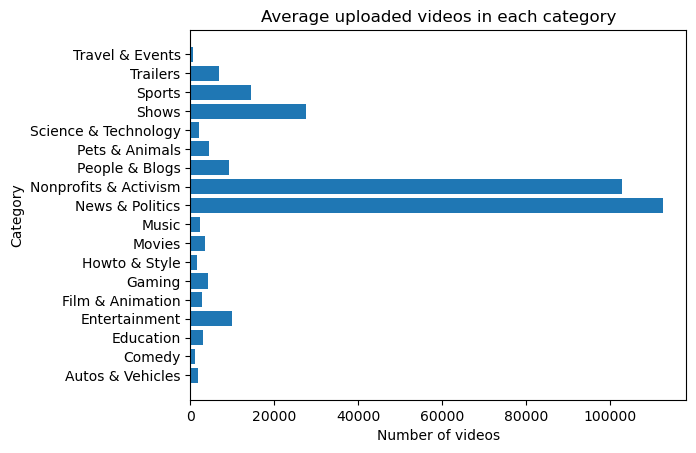

In [14]:
plt.barh(avg_upload.index,avg_upload)
plt.xlabel("Number of videos")
plt.ylabel("Category")
plt.title("Average uploaded videos in each category")
plt.show()

In [15]:
# country of origin and country column are same, so drop country of origin column
df.drop(columns=['Country of origin'], inplace=True)
print(df.columns)

Index(['rank', 'Youtuber', 'subscribers', 'video views', 'category', 'Title',
       'uploads', 'Country', 'Abbreviation', 'channel_type',
       'video_views_rank', 'country_rank', 'channel_type_rank',
       'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'subscribers_for_last_30_days',
       'created_year', 'created_month', 'created_date',
       'Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude'],
      dtype='object')


In [16]:
# for country columns we have 125 missing values and as it is categorical in nature, we need to use mode imputation to
# compensate for the missing values
df['Country'] = df['Country'].fillna(df['Country'].mode()[0])
print(df.isnull().sum())

rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                     0
Title                                        0
uploads                                      0
Country                                      0
Abbreviation                               122
channel_type                                30
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               336
created_year                                 5
created_month                               12
created_date 

In [17]:
df['Country'] = df['Country'].replace('india', 'India')

In [18]:
# Q4.	What are the top 5 countries with the highest number of YouTube channels?

group_by_country = df.groupby('Country')
country_with_channel_count = group_by_country['Youtuber'].count()
country_with_channel_count = country_with_channel_count.reset_index(name = 'Number of Youtube channels')
country_with_channel_count.sort_values("Number of Youtube channels", ascending=False, inplace=True)
print(country_with_channel_count.head())

           Country  Number of Youtube channels
46   United States                         435
18           India                         167
6           Brazil                          62
45  United Kingdom                          43
27          Mexico                          33


In [19]:
# channel type column has 32 missing values
# use mode imputation to fill the missing values
df['channel_type'] = df['channel_type'].fillna(df['channel_type'].mode()[0])
print(df.isnull().sum())

rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                     0
Title                                        0
uploads                                      0
Country                                      0
Abbreviation                               122
channel_type                                 0
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               336
created_year                                 5
created_month                               12
created_date 

In [20]:
print(df['channel_type'].unique())
print('-----------------------')
print(df['category'].unique())

['Music' 'Games' 'Entertainment' 'Education' 'People' 'Sports' 'Film'
 'News' 'Comedy' 'Howto' 'Nonprofit' 'Autos' 'Tech' 'Animals']
-----------------------
['Music' 'Film & Animation' 'Entertainment' 'Education' 'Shows'
 'People & Blogs' 'Gaming' 'Sports' 'Howto & Style' 'News & Politics'
 'Comedy' 'Trailers' 'Nonprofits & Activism' 'Science & Technology'
 'Movies' 'Pets & Animals' 'Autos & Vehicles' 'Travel & Events']


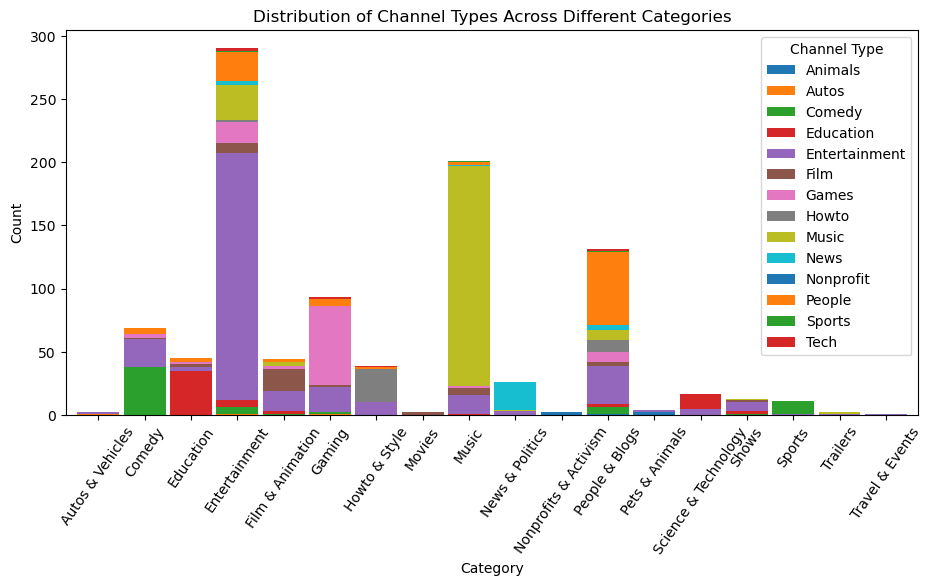

In [21]:
# Q5.	What is the distribution of channel types across different categories?

# group and count the data

grouped_data = df.groupby(['channel_type', 'category']).size().reset_index(name='count')  #calculates the size of each group,
# i.e., the number of occurrences of each unique combination of 'channel_type' and 'category'.
# reset_index() converts the resulting Series from .size() back into a DataFrame. The grouped columns 'channel_type' 
# and 'category' become normal columns again instead of being the index.
# name='count' names the new column created by .size() as 'count'. This column contains the number of occurrences for 
# each combination of 'channel_type' and 'category'.


# Pivot the data
pivot_data = grouped_data.pivot(index='category', columns='channel_type', values='count').fillna(0) 
# fillna(0) replaces any missing values with zeros, ensuring that all possible combinations of channel_type and
# category are represented, even if the count is zero.

# Non-Pivoted Data (Long Format)
# channel_type    category   count
# Type A          Cat 1      10
# Type A          Cat 2      5
# Type B          Cat 1      7
# Type B          Cat 2      8
# Type C          Cat 1      3
# Type C          Cat 2      9

# Pivoted Data (Wide Format)
# channel_type  Cat 1   Cat 2
# Type A        10       5
# Type B         7       8
# Type C         3       9

# Plot the data
pivot_data.plot(kind='bar',stacked=True, figsize=(11, 5), width=0.9)

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=55)
plt.title('Distribution of Channel Types Across Different Categories')
plt.legend(title='Channel Type')
plt.show()

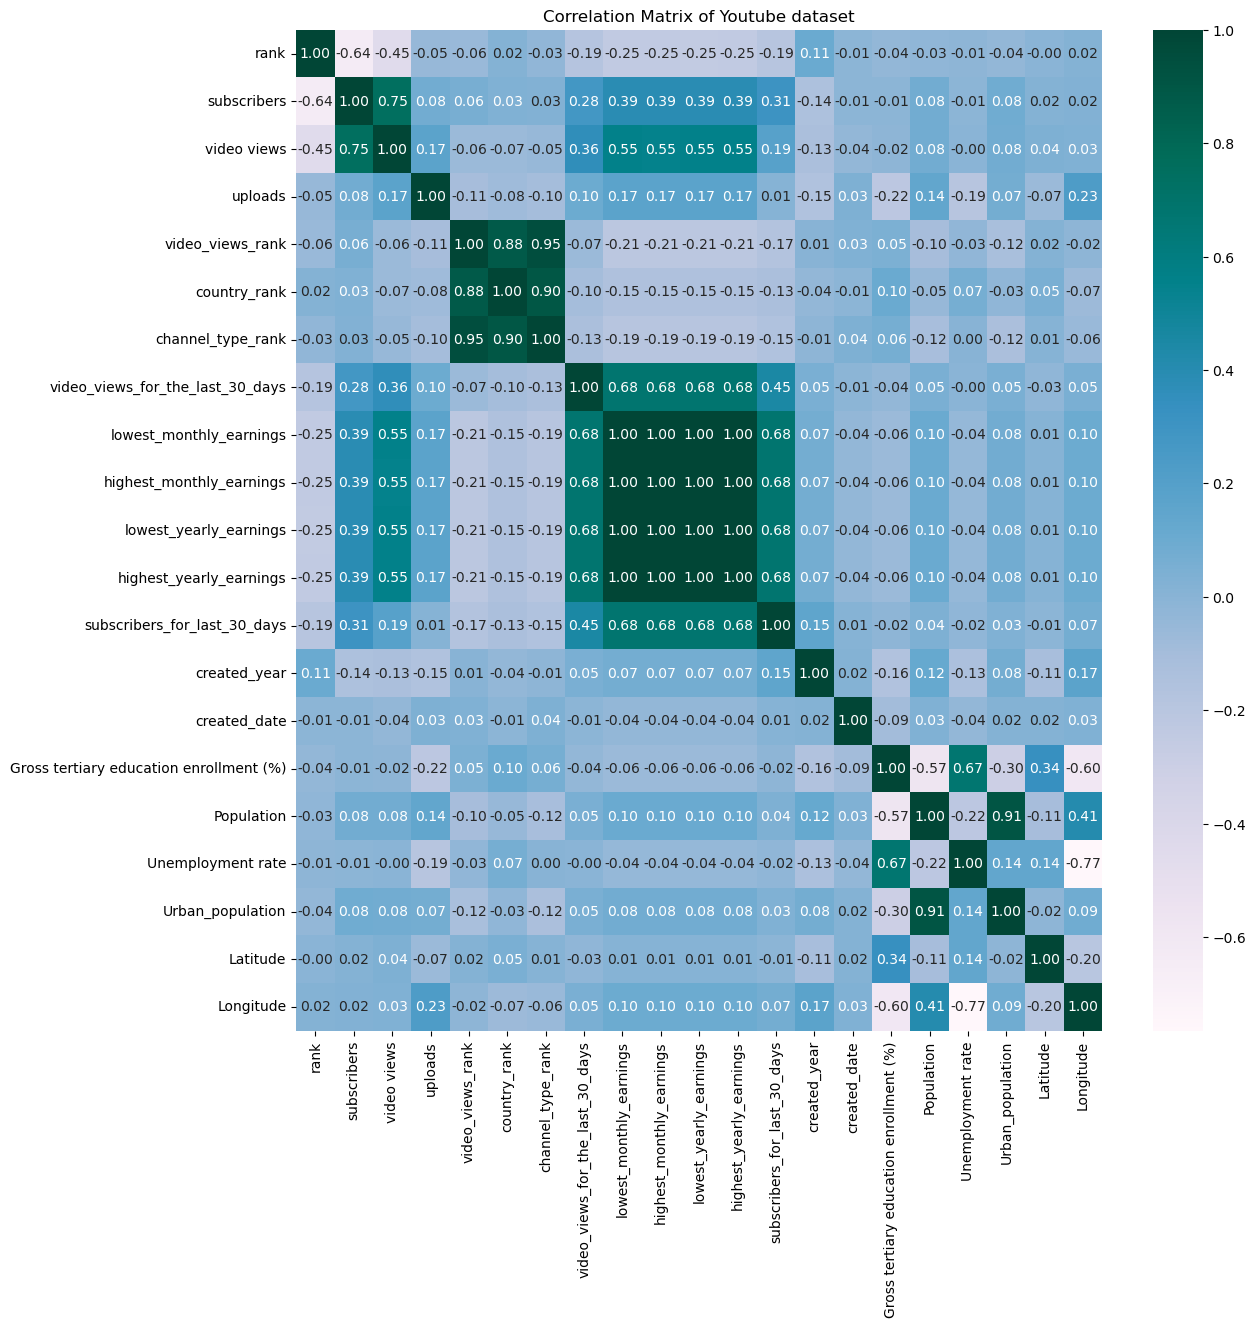

In [22]:
# Q6.	Is there a correlation between the number of subscribers and total video views for YouTube channels?

# Ans 	 Yes, as the correlation coefficient is 0.75, there is moderate-to-good correlation between no. of subscribers 
#        and video views.

numeric_df = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(13,13))
sns.heatmap(corr_matrix, annot=True, cmap='PuBuGn', fmt='0.2f')
plt.title('Correlation Matrix of Youtube dataset')
plt.show()

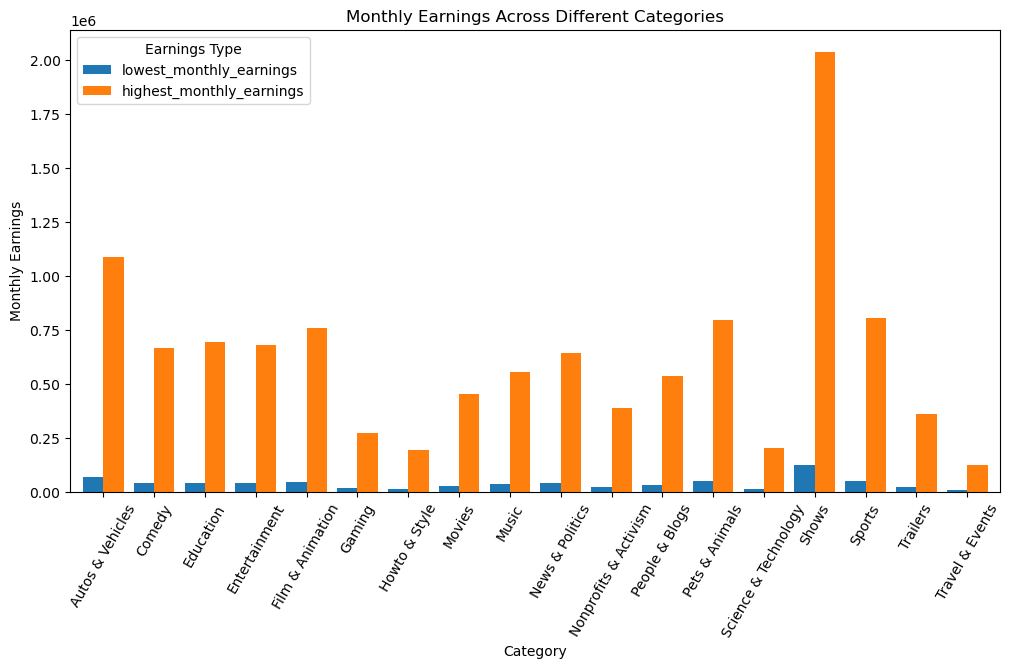

In [23]:
# Q7.	How do the monthly earnings vary throughout different categories?
#monthly_earn = grouped['lowest_monthly_earnings', 'highest_monthly_earnings']
group_by_cat = df.groupby('category')[['lowest_monthly_earnings', 'highest_monthly_earnings']].mean()
#df.set_index('category', inplace=True)
group_by_cat.plot(kind='bar', figsize=(12,6), width=0.8)
plt.xlabel('Category')
plt.ylabel('Monthly Earnings')
plt.title('Monthly Earnings Across Different Categories')
plt.xticks(rotation=60)  # Rotate x-axis labels for better readability
plt.legend(title='Earnings Type')
plt.show()

In [24]:
agg_func = {
    'lowest_monthly_earnings':['min', 'max'],
    'highest_monthly_earnings':['min', 'max']
}
group_to_find_min_max = df.groupby('category').agg(agg_func)
print(group_to_find_min_max)

                      lowest_monthly_earnings            \
                                          min       max   
category                                                  
Autos & Vehicles                      48300.0   88300.0   
Comedy                                    0.0  311200.0   
Education                                 0.0  493800.0   
Entertainment                             0.0  850900.0   
Film & Animation                          0.0  576000.0   
Gaming                                    0.0  270300.0   
Howto & Style                             0.0  125700.0   
Movies                                    0.0   56800.0   
Music                                     0.0  564600.0   
News & Politics                           0.0  115400.0   
Nonprofits & Activism                 11400.0   37400.0   
People & Blogs                            0.0  340900.0   
Pets & Animals                            0.0  188800.0   
Science & Technology                      0.0   41900.0 

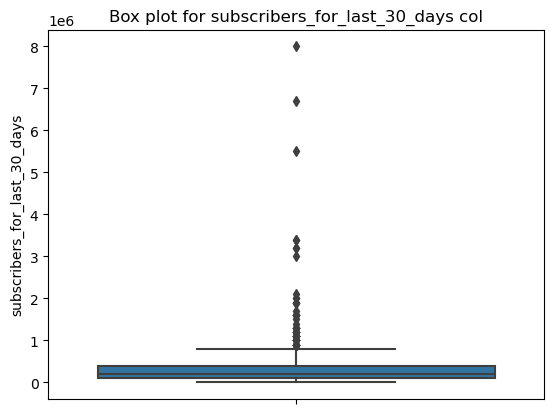

In [25]:
# Q8.	What is the overall trend in subscribers gained in the last 30 days across all channels?
# print(df.isnull().sum())

# subscribers_for_last_30_days column has 339 missing values
sns.boxplot(y='subscribers_for_last_30_days', data=df)
plt.title('Box plot for subscribers_for_last_30_days col')
plt.show()

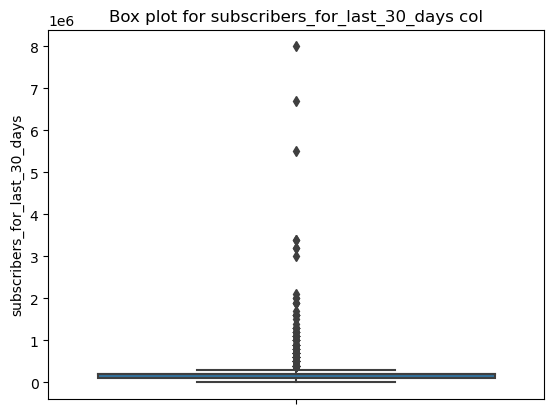

In [26]:
# due to the pressence of outliers we will use mdeian imputation
df['subscribers_for_last_30_days'] = df['subscribers_for_last_30_days'].fillna(df['subscribers_for_last_30_days'].median())
sns.boxplot(y='subscribers_for_last_30_days', data=df)
plt.title('Box plot for subscribers_for_last_30_days col')
plt.show()
# print(df.isnull().sum())

In [27]:
# Answer for the Q8
print(df['subscribers_for_last_30_days'].describe())

count    9.920000e+02
mean     2.990868e+05
std      5.051075e+05
min      1.000000e+00
25%      1.000000e+05
50%      2.000000e+05
75%      2.000000e+05
max      8.000000e+06
Name: subscribers_for_last_30_days, dtype: float64


In [28]:
# Q9.	Are there any outliers in terms of yearly earnings from YouTube channels?
print(df.isnull().sum())

rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                     0
Title                                        0
uploads                                      0
Country                                      0
Abbreviation                               122
channel_type                                 0
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days                 0
created_year                                 5
created_month                               12
created_date 

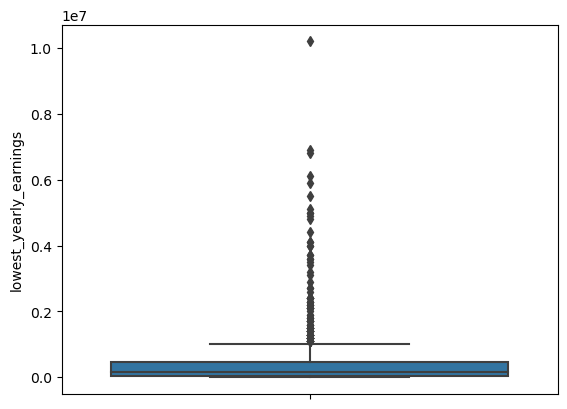

In [29]:
sns.boxplot(y='lowest_yearly_earnings', data=df)
plt.show()

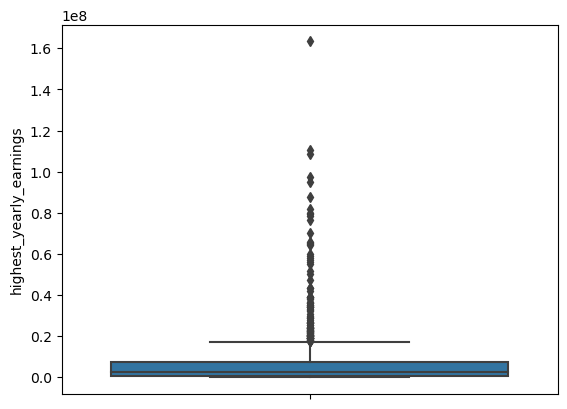

In [30]:
sns.boxplot(y='highest_yearly_earnings',data=df)
plt.show()

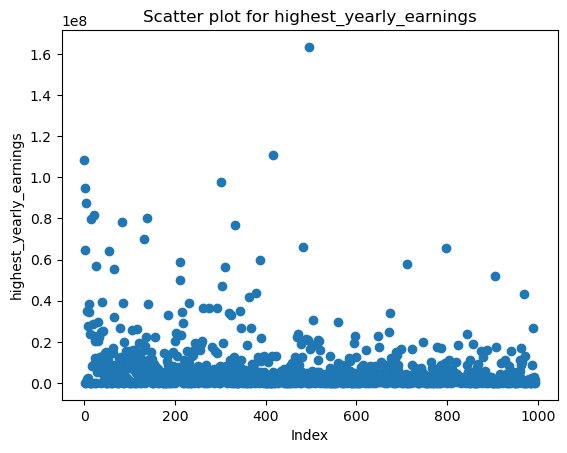

In [31]:
plt.scatter(df.index, df['highest_yearly_earnings'])
# This refers to the index of the DataFrame, which is used as the x-axis values in the scatter plot. 
# It represents the position of each data point in the DataFrame.

plt.title('Scatter plot for highest_yearly_earnings')
plt.xlabel('Index')
plt.ylabel('highest_yearly_earnings')
plt.show()

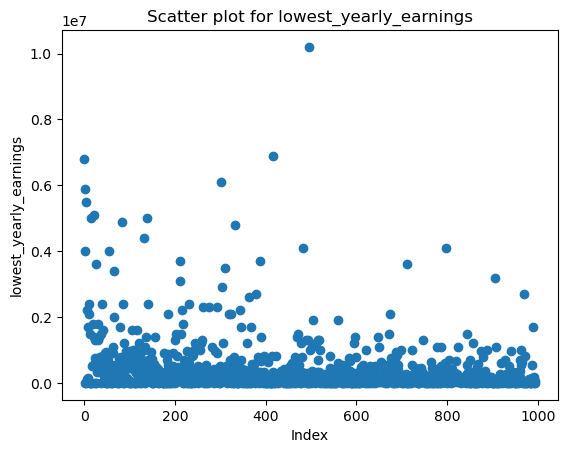

In [32]:
plt.scatter(df.index, df['lowest_yearly_earnings'])
plt.title('Scatter plot for lowest_yearly_earnings')
plt.xlabel('Index')
plt.ylabel('lowest_yearly_earnings')
plt.show()

In [33]:
# Q10.	What is the distribution of channel creation dates? Is there any trend over time?
df['created_date'] = df['created_date'].fillna(df['created_date'].median())
df['created_month'] = df['created_month'].fillna(df['created_month'].mode()[0])
df['created_year'] = df['created_year'].fillna(df['created_year'].median())
print(df.isnull().sum())

rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                     0
Title                                        0
uploads                                      0
Country                                      0
Abbreviation                               122
channel_type                                 0
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days                 0
created_year                                 0
created_month                                0
created_date 

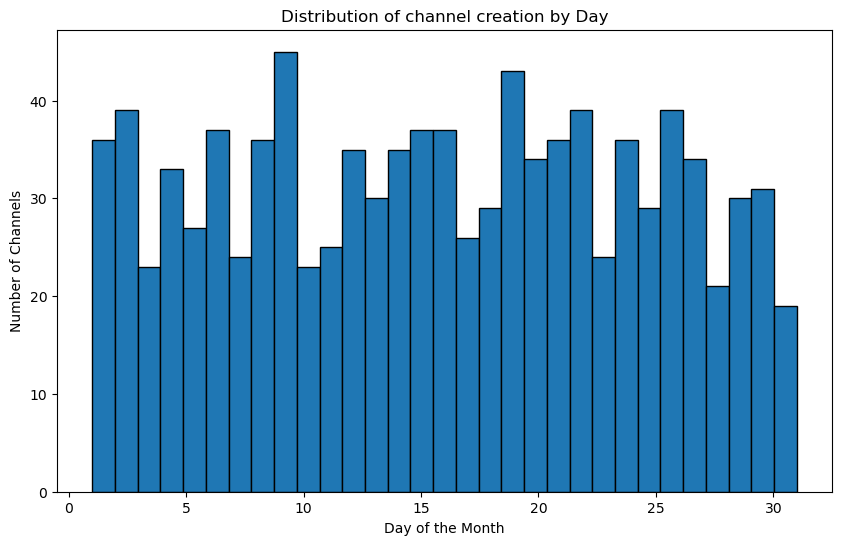

In [34]:
# Plot the distribution of created_date
plt.figure(figsize=(10, 6))
plt.hist(df['created_date'],bins=31, edgecolor='black')
plt.title('Distribution of channel creation by Day')
plt.xlabel('Day of the Month')
plt.ylabel('Number of Channels')
plt.show()

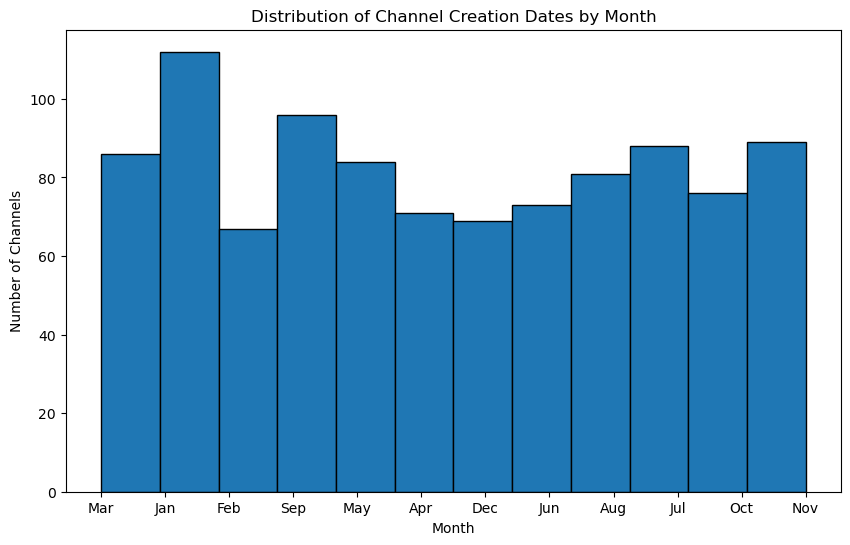

In [35]:
# Plot the distribution of created_month
plt.figure(figsize=(10, 6))
plt.hist(df['created_month'], bins=12, edgecolor='black')
plt.title('Distribution of Channel Creation Dates by Month')
plt.xlabel('Month')
plt.ylabel('Number of Channels')
plt.show()

In [36]:
# print(df['created_year'])
grouped = df.groupby('created_year')['created_year'].count()
print(grouped)

created_year
1970.0     1
2005.0    24
2006.0    91
2007.0    49
2008.0    46
2009.0    52
2010.0    48
2011.0    82
2012.0    66
2013.0    81
2014.0    98
2015.0    72
2016.0    77
2017.0    68
2018.0    46
2019.0    33
2020.0    30
2021.0    23
2022.0     5
Name: created_year, dtype: int64


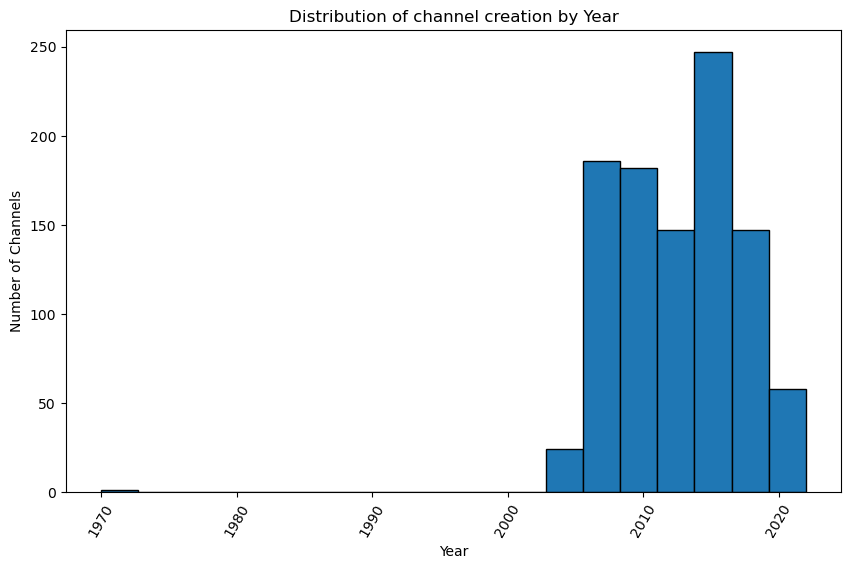

In [37]:
# Plot the distribution of created_year
plt.figure(figsize=(10, 6))
plt.hist(df['created_year'], bins=len(df['created_year'].unique()), edgecolor='black')
plt.title('Distribution of channel creation by Year')
plt.xlabel('Year')
plt.ylabel('Number of Channels')
plt.xticks(rotation=60)
plt.show()

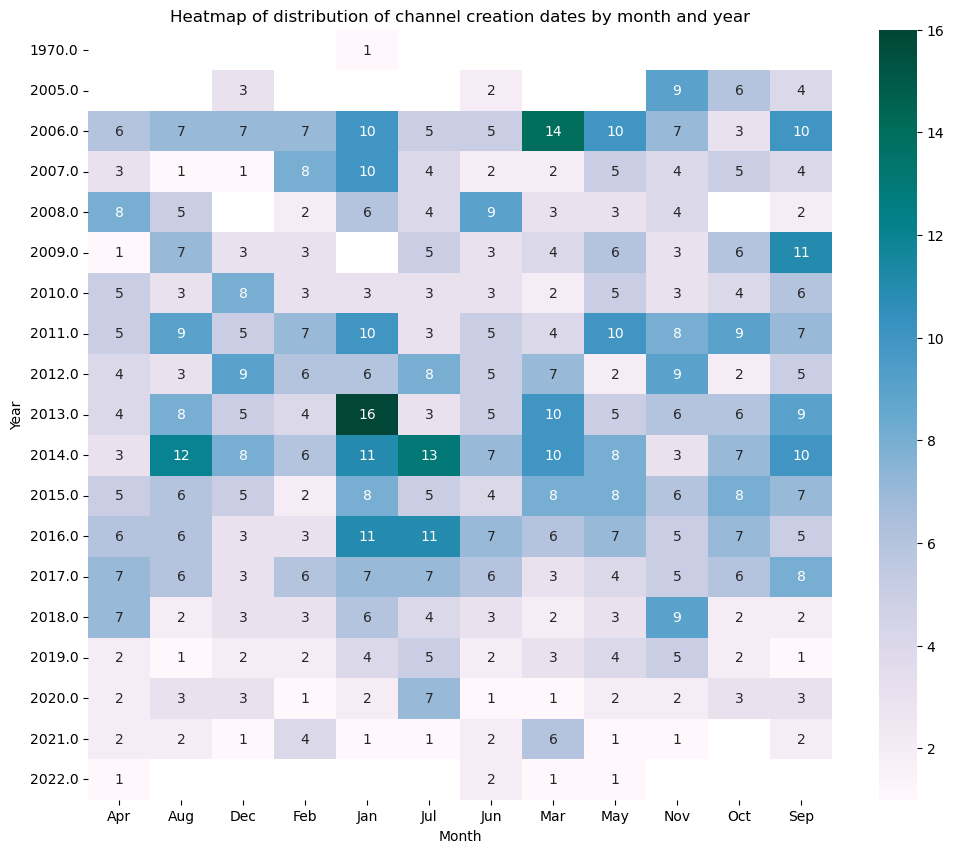

In [38]:
# Creating a pivot table
pivot_table = df.pivot_table(index='created_year', columns='created_month', values='created_date', aggfunc='count')

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(pivot_table, annot=True, cmap="PuBuGn")
plt.title('Heatmap of distribution of channel creation dates by month and year')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

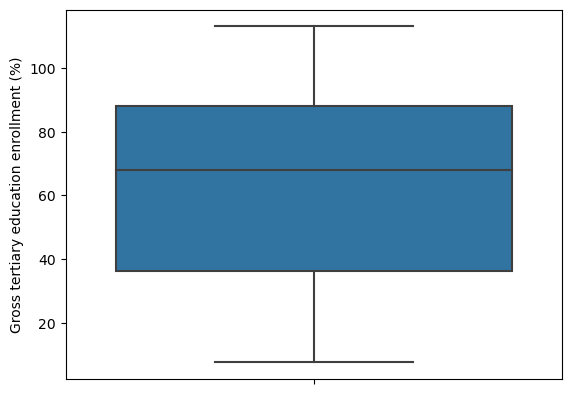

In [39]:
# Q11.	Is there a relationship between gross tertiary education enrollment and the number of YouTube channels in a country?

# print(df.isnull().sum())

sns.boxplot(y='Gross tertiary education enrollment (%)', data=df)
plt.show()

In [40]:
df['Gross tertiary education enrollment (%)'] = df['Gross tertiary education enrollment (%)'].fillna(df['Gross tertiary education enrollment (%)'].mean())
print(df.isnull().sum())

rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                     0
Title                                        0
uploads                                      0
Country                                      0
Abbreviation                               122
channel_type                                 0
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days                 0
created_year                                 0
created_month                                0
created_date 

In [41]:
grouped_by_country_youtuber_count = df.groupby('Country')['Youtuber'].count().reset_index(name='Number of youtube channels')
grouped_by_country_gross = df.groupby('Country')['Gross tertiary education enrollment (%)'].mean().reset_index()
print(grouped_by_country_gross)
print(grouped_by_country_youtuber_count)

                 Country  Gross tertiary education enrollment (%)
0            Afghanistan                                 9.700000
1                Andorra                                63.633487
2              Argentina                                90.000000
3              Australia                               113.100000
4             Bangladesh                                20.600000
5               Barbados                                65.400000
6                 Brazil                                51.300000
7                 Canada                                68.900000
8                  Chile                                88.500000
9                  China                                50.600000
10              Colombia                                55.300000
11                  Cuba                                41.400000
12               Ecuador                                44.900000
13                 Egypt                                35.200000
14        

In [42]:
print(grouped_by_country_youtuber_count['Number of youtube channels'].corr(grouped_by_country_gross['Gross tertiary education enrollment (%)']))

0.09212807943074247


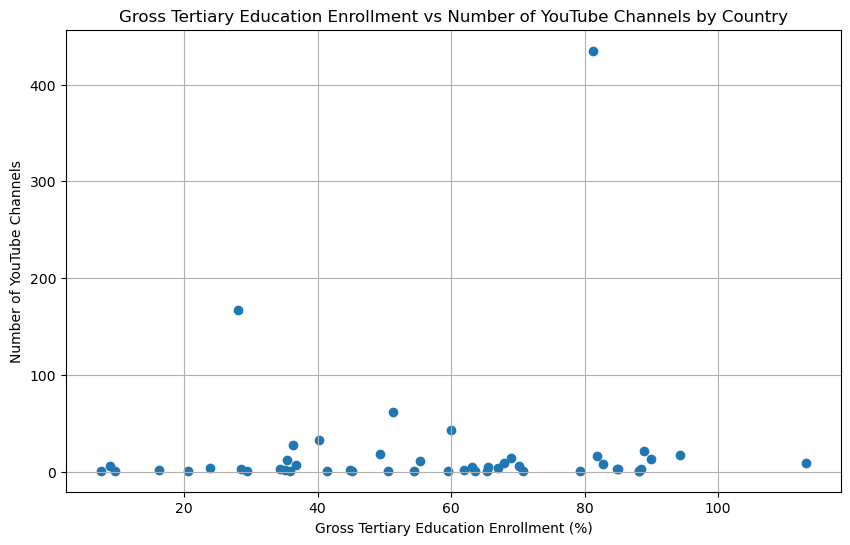

In [43]:
merged_df = pd.merge(grouped_by_country_gross, grouped_by_country_youtuber_count, on='Country')
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['Gross tertiary education enrollment (%)'], merged_df['Number of youtube channels'])
plt.title('Gross Tertiary Education Enrollment vs Number of YouTube Channels by Country')
plt.xlabel('Gross Tertiary Education Enrollment (%)')
plt.ylabel('Number of YouTube Channels')
plt.grid(True)
plt.show()

In [44]:
# print(df.isnull().sum())
# sns.boxplot(y='Unemployment rate', data=df)
# plt.show()
df['Unemployment rate'] = df['Unemployment rate'].fillna(df['Unemployment rate'].mean())
print(df.isnull().sum())

rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                     0
Title                                        0
uploads                                      0
Country                                      0
Abbreviation                               122
channel_type                                 0
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days                 0
created_year                                 0
created_month                                0
created_date 

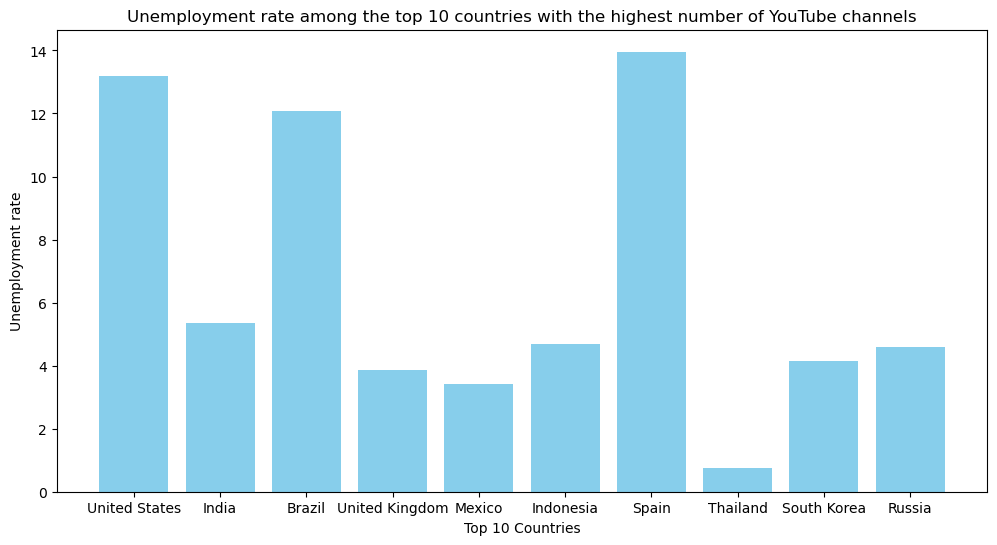

In [45]:
# Q12.	How does the unemployment rate vary among the top 10 countries with the highest number of YouTube channels?

grouped_by_country = df.groupby('Country')['Youtuber'].count().reset_index(name='Number of youtube channels')
grouped_by_country.sort_values('Number of youtube channels',ascending=False, inplace=True)
grouped_by_country = grouped_by_country.head(10) 
# print(grouped_by_country)
grouped_by_country_ur = df.groupby('Country')['Unemployment rate'].mean().reset_index()
grouped_by_country_ur_top10 = pd.merge(grouped_by_country, grouped_by_country_ur, on='Country')
# print(grouped_by_country_ur_top10)
# plt.scatter(grouped_by_country_ur_top10['Unemployment rate'], grouped_by_country_ur_top10['Number of youtube channels'])
plt.figure(figsize=(12, 6))
plt.bar(grouped_by_country_ur_top10['Country'], grouped_by_country_ur_top10['Unemployment rate'], color='skyblue')
plt.title("Unemployment rate among the top 10 countries with the highest number of YouTube channels")
plt.xlabel("Top 10 Countries")
plt.ylabel("Unemployment rate")
plt.show()

In [46]:
print(grouped_by_country_ur_top10)

          Country  Number of youtube channels  Unemployment rate
0   United States                         435           13.18066
1           India                         167            5.36000
2          Brazil                          62           12.08000
3  United Kingdom                          43            3.85000
4          Mexico                          33            3.42000
5       Indonesia                          28            4.69000
6           Spain                          21           13.96000
7        Thailand                          18            0.75000
8     South Korea                          17            4.15000
9          Russia                          16            4.59000


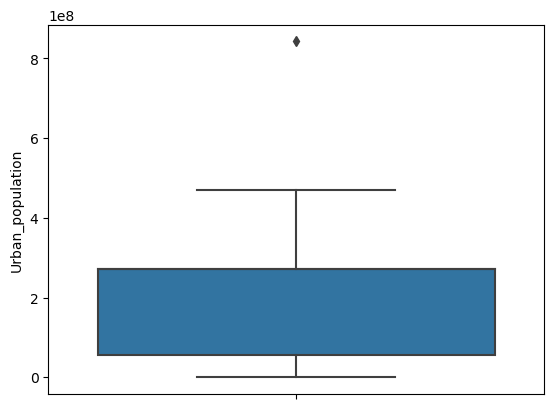

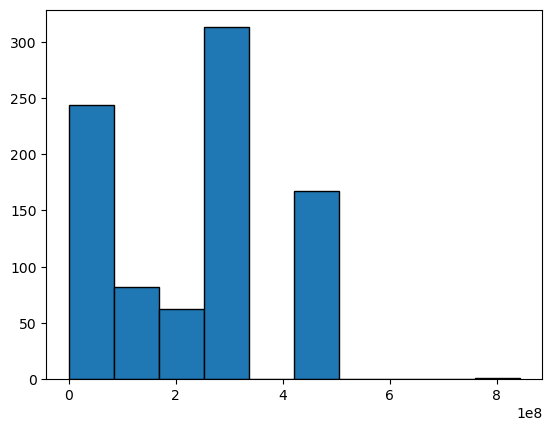

In [47]:
# Q13.	What is the average urban population percentage in countries with YouTube channels?
sns.boxplot(y='Urban_population',data=df)
plt.show()
plt.hist(df['Urban_population'], edgecolor='Black')
plt.show()

In [48]:
df['Urban_population'] = df['Urban_population'].fillna(df['Urban_population'].median())
print(df.isnull().sum())
grouped_by_country = df.groupby('Country')
print(grouped_by_country['Urban_population'].mean())

rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                     0
Title                                        0
uploads                                      0
Country                                      0
Abbreviation                               122
channel_type                                 0
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days                 0
created_year                                 0
created_month                                0
created_date 

In [49]:
urban_pop = grouped_by_country['Urban_population'].mean()
total_pop = urban_pop.sum()
df['urban_pop_percent'] = (df['Urban_population']/total_pop)*100
urban_pop_percentage = df.groupby('Country')['urban_pop_percent'].mean().reset_index(name='avg percentage')
print(urban_pop_percentage)

                 Country  avg percentage
0            Afghanistan        0.270811
1                Andorra        7.481535
2              Argentina        1.142688
3              Australia        0.603822
4             Bangladesh        1.685784
5               Barbados        0.002472
6                 Brazil        5.065076
7                 Canada        0.846618
8                  Chile        0.459129
9                  China       23.299968
10              Colombia        1.128528
11                  Cuba        0.241563
12               Ecuador        0.307283
13                 Egypt        1.185705
14           El Salvador        0.129769
15               Finland        0.130382
16                France        1.496052
17               Germany        1.778036
18                 India       13.020023
19             Indonesia        4.187958
20                  Iraq        0.767974
21                 Italy        1.178965
22                 Japan        3.200401
23              

In [50]:
print(urban_pop_percentage['Country'])

0              Afghanistan
1                  Andorra
2                Argentina
3                Australia
4               Bangladesh
5                 Barbados
6                   Brazil
7                   Canada
8                    Chile
9                    China
10                Colombia
11                    Cuba
12                 Ecuador
13                   Egypt
14             El Salvador
15                 Finland
16                  France
17                 Germany
18                   India
19               Indonesia
20                    Iraq
21                   Italy
22                   Japan
23                  Jordan
24                  Kuwait
25                  Latvia
26                Malaysia
27                  Mexico
28                 Morocco
29             Netherlands
30                Pakistan
31                    Peru
32             Philippines
33                  Russia
34                   Samoa
35            Saudi Arabia
36               Singapore
3

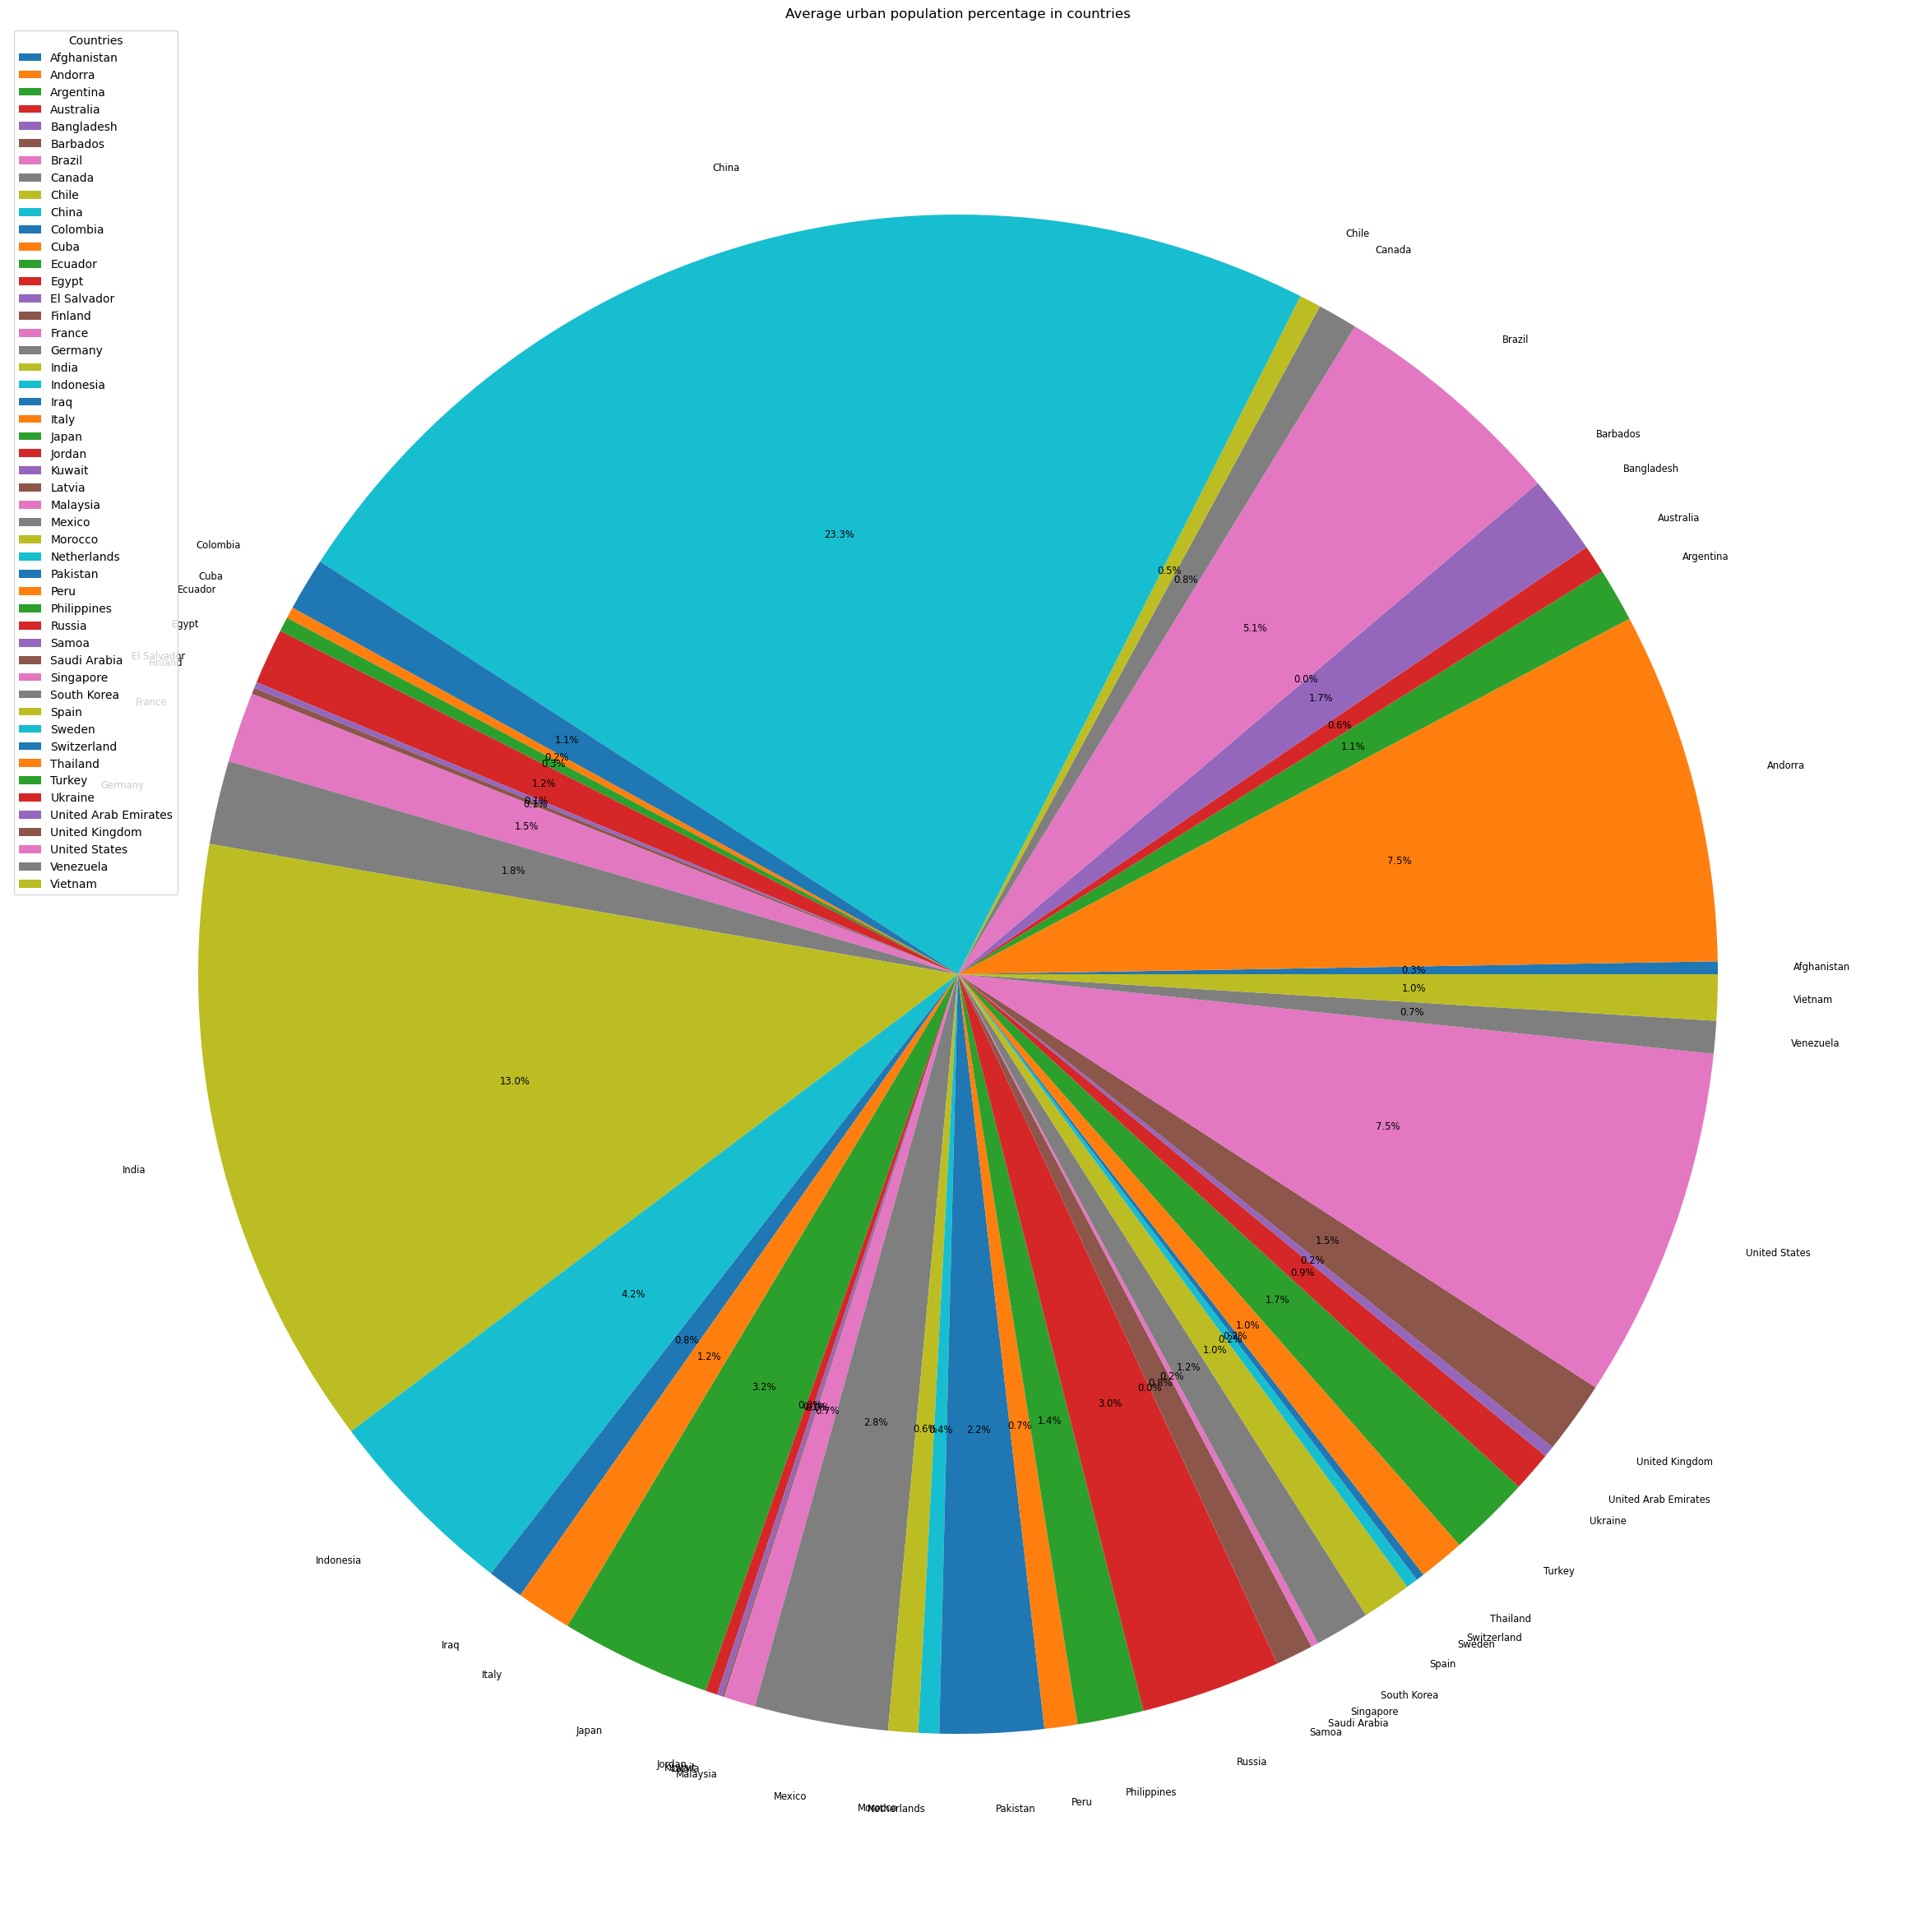

In [51]:
# plt.hist(urban_pop_percentage, edgecolor='Black')
mylabel = ["Afghanistan","Andorra","Argentina","Australia","Bangladesh","Barbados","Brazil","Canada","Chile","China","Colombia",
    "Cuba","Ecuador","Egypt","El Salvador",
    "Finland",
    "France",
    "Germany",
    "India",
    "Indonesia",
    "Iraq",
    "Italy",
    "Japan",
    "Jordan",
    "Kuwait",
    "Latvia",
    "Malaysia",
    "Mexico",
    "Morocco",
    "Netherlands",
    "Pakistan",
    "Peru",
    "Philippines",
    "Russia",
    "Samoa",
    "Saudi Arabia",
    "Singapore",
    "South Korea",
    "Spain",
    "Sweden",
    "Switzerland",
    "Thailand",
    "Turkey",
    "Ukraine",
    "United Arab Emirates",
    "United Kingdom",
    "United States",
    "Venezuela",
    "Vietnam"
]
# plt.pie(urban_pop_percentage['avg percentage'], labels = mylabel)
# plt.figure(figsize=(35,35))
fig, ax = plt.subplots(figsize=(30,30))
ax.pie(urban_pop_percentage['avg percentage'], labels=mylabel, textprops={'size': 'smaller'}, radius=1, autopct='%1.1f%%')

plt.legend(title='Countries', loc='upper left')
plt.title("Average urban population percentage in countries")
plt.show()

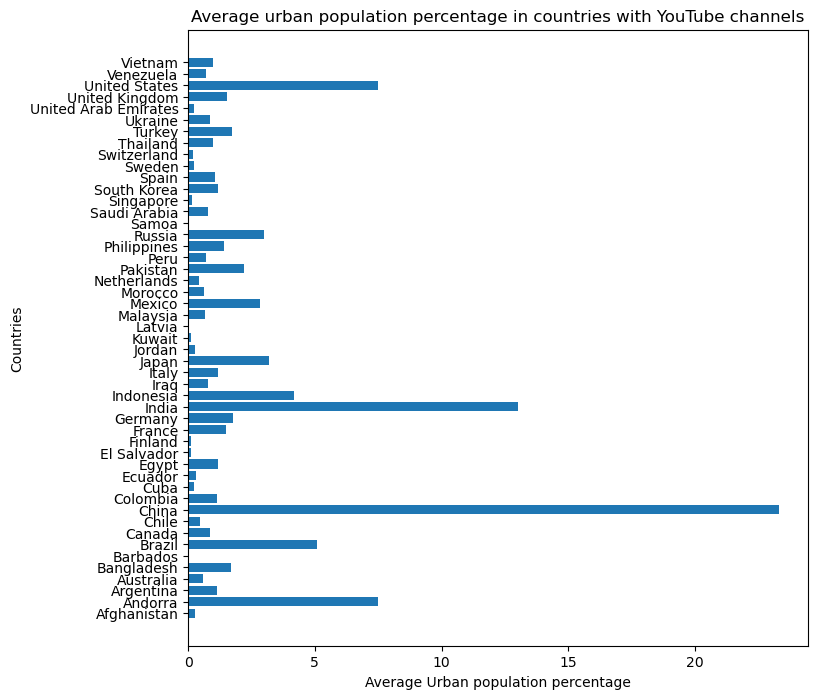

In [52]:
plt.figure(figsize=(8,8))
plt.barh(mylabel, urban_pop_percentage['avg percentage'])
plt.title("Average urban population percentage in countries with YouTube channels")
plt.xlabel("Average Urban population percentage")
plt.ylabel("Countries")
plt.show()

In [53]:
# Q 14.	Are there any patterns in the distribution of YouTube channels based on latitude and longitude coordinates?

print(df.isnull().sum())
grouped_country = df.groupby('Country')
# print(grouped_country['Latitude'].unique())
# print(grouped_country['Longitude'].unique())

rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                     0
Title                                        0
uploads                                      0
Country                                      0
Abbreviation                               122
channel_type                                 0
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days                 0
created_year                                 0
created_month                                0
created_date 

In [54]:
df.loc[df['Country'] == 'Andorra', 'Latitude'] = 42.506317
df.loc[df['Country'] == 'Andorra', 'Longitude'] = 1.521835
df['Latitude'] = df.groupby('Country')['Latitude'].transform(lambda x: x.fillna(x.mean()))
df['Longitude'] = df.groupby('Country')['Longitude'].transform(lambda x: x.fillna(x.mean()))
print(df.isnull().sum())

rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                     0
Title                                        0
uploads                                      0
Country                                      0
Abbreviation                               122
channel_type                                 0
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days                 0
created_year                                 0
created_month                                0
created_date 

In [55]:
print(df['Latitude'].unique())
print(df['Longitude'].unique())

[ 20.593684  37.09024   36.204824  61.52401   35.907757  55.378051
  56.130366 -14.235004 -38.416097 -35.675147  21.521757  13.794185
  30.375321  12.879721  15.870032   4.570868  13.193887  23.634501
  23.424076  40.463667  23.885942  -0.789275  38.963745   6.42375
  29.31166   30.585164  52.132633   1.352083 -25.274398  41.87194
  51.165691  46.227638  60.128161  33.93911   48.379433  56.879635
  46.818188  14.058324   4.210484  35.86166   33.223191  26.820553
  42.506317  -1.831239  31.791702  -9.189967  23.684994  61.92411
 -13.759029]
[  78.96288   -95.712891  138.252924  105.318756  127.766922   -3.435973
 -106.346771  -51.92528   -63.616672  -71.542969  -77.781167  -88.89653
   69.345116  121.774017  100.992541  -74.297333  -59.543198 -102.552784
   53.847818   -3.74922    45.079162  113.921327   35.243322  -66.58973
   47.481766   36.238414    5.291266  103.819836  133.775136   12.56738
   10.451526    2.213749   18.643501   67.709953   31.16558    24.603189
    8.227512  108.2

C:\Users\HP\AppData\Local\Temp\ipykernel_15156\2435096494.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df['Longitude'],y= df['Latitude'], shade=True, cmap='viridis')


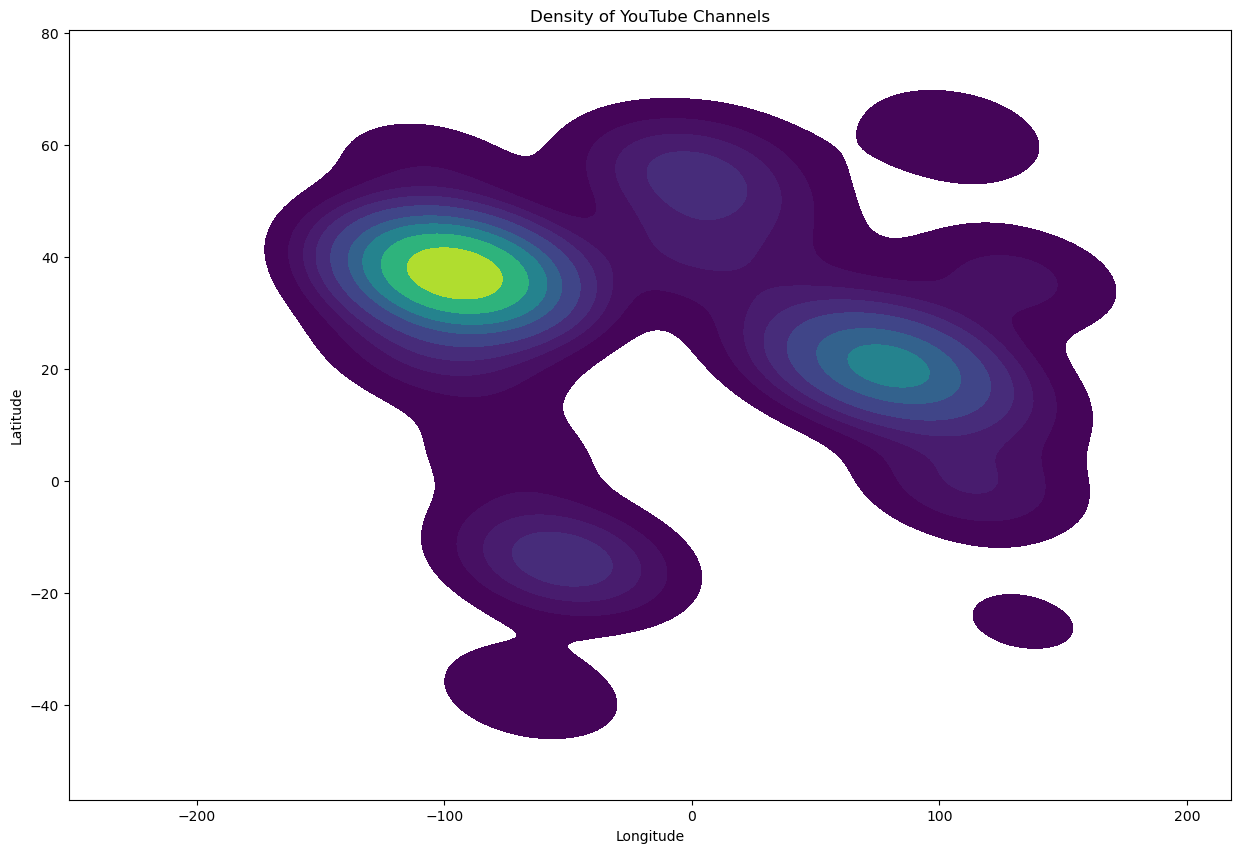

In [56]:
# Creating a scatter plot with density
plt.figure(figsize=(15, 10))
sns.kdeplot(x=df['Longitude'],y= df['Latitude'], shade=True, cmap='viridis')

# In the viridis colormap:

# Dark Blue/Purple: Represents areas with the lowest density of points.
# Green: Represents areas with a medium density of points.
# Yellow/White: Represents areas with the highest density of points.

plt.title('Density of YouTube Channels')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [57]:
# Q15.	What is the correlation between the number of subscribers and the population of a country?

subscribers = df.groupby('Country')['subscribers'].sum()
pop = df.groupby('Country')['Population'].mean()
# print(subscribers)
# print(pop)
print(pop.corr(subscribers))

# Ans --> correlation coefficient is 0.35436488224143614

0.36137613123758516


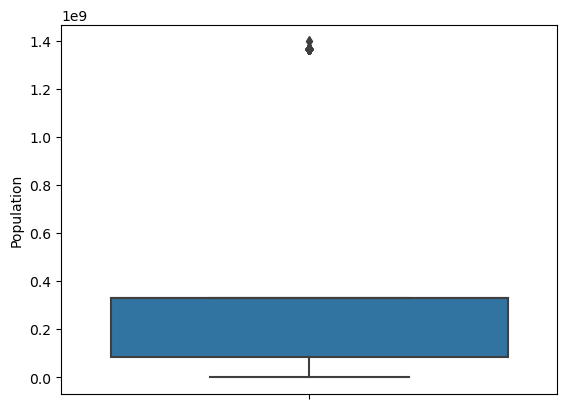

In [58]:
# Q16.	How do the top 10 countries with the highest number of YouTube channels compare in terms of their total population?
sns.boxplot(y = 'Population', data=df)
plt.show()

In [59]:
df['Population'] = df['Population'].fillna(df['Population'].median())

In [60]:
top10_countries = df.groupby('Country')['Youtuber'].count().sort_values(ascending=False).head(10)
top10_countries_pop = df.groupby('Country')['Population'].mean().head(10)
# print(top10_countries)
# print(top10_countries['Population'])

# creating population data frame
population_data = {
    'Country': ['United States', 'India', 'Brazil', 'United Kingdom', 'Mexico', 'Indonesia','Spain','Thailand', 'South Korea', 'Russia'],
    'Population': [328239523,1366417754, 212559417, 66834405, 126014024, 270203917, 47076781, 69625582, 51709098, 144373535]
}
population_df = pd.DataFrame(population_data)

# Convert top10_countries to a DataFrame
top10_countries_df = top10_countries.reset_index(name='Channel_Count')

# Merge with the population DataFrame
result_df = top10_countries_df.merge(population_df, on='Country', how='left')
print(result_df)

          Country  Channel_Count  Population
0   United States            435   328239523
1           India            167  1366417754
2          Brazil             62   212559417
3  United Kingdom             43    66834405
4          Mexico             33   126014024
5       Indonesia             28   270203917
6           Spain             21    47076781
7        Thailand             18    69625582
8     South Korea             17    51709098
9          Russia             16   144373535


In [61]:
print(result_df.describe())

       Channel_Count    Population
count      10.000000  1.000000e+01
mean       84.000000  2.683054e+08
std       131.415372  3.977828e+08
min        16.000000  4.707678e+07
25%        18.750000  6.753220e+07
50%        30.500000  1.351938e+08
75%        57.250000  2.557928e+08
max       435.000000  1.366418e+09


In [62]:
# Correlation between the number of YouTube channels and population
correlation = result_df['Channel_Count'].corr(result_df['Population'])
print(correlation)

0.38005810283570296


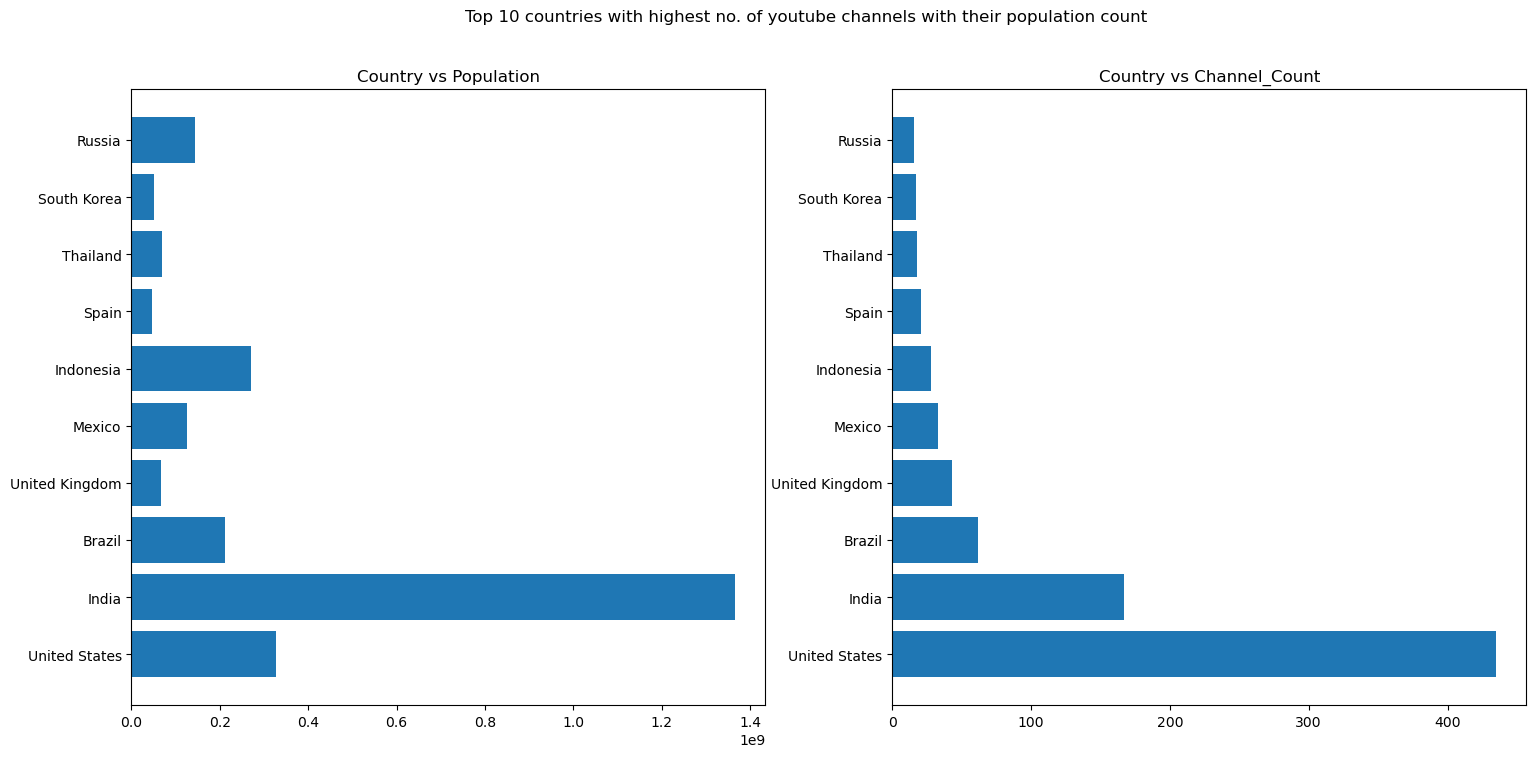

In [63]:
plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
plt.barh(result_df['Country'],result_df['Population'])
plt.title("Country vs Population")

plt.subplot(1,2,2)
plt.barh(result_df['Country'],result_df['Channel_Count'])
plt.title("Country vs Channel_Count")
plt.suptitle("Top 10 countries with highest no. of youtube channels with their population count")
plt.show()

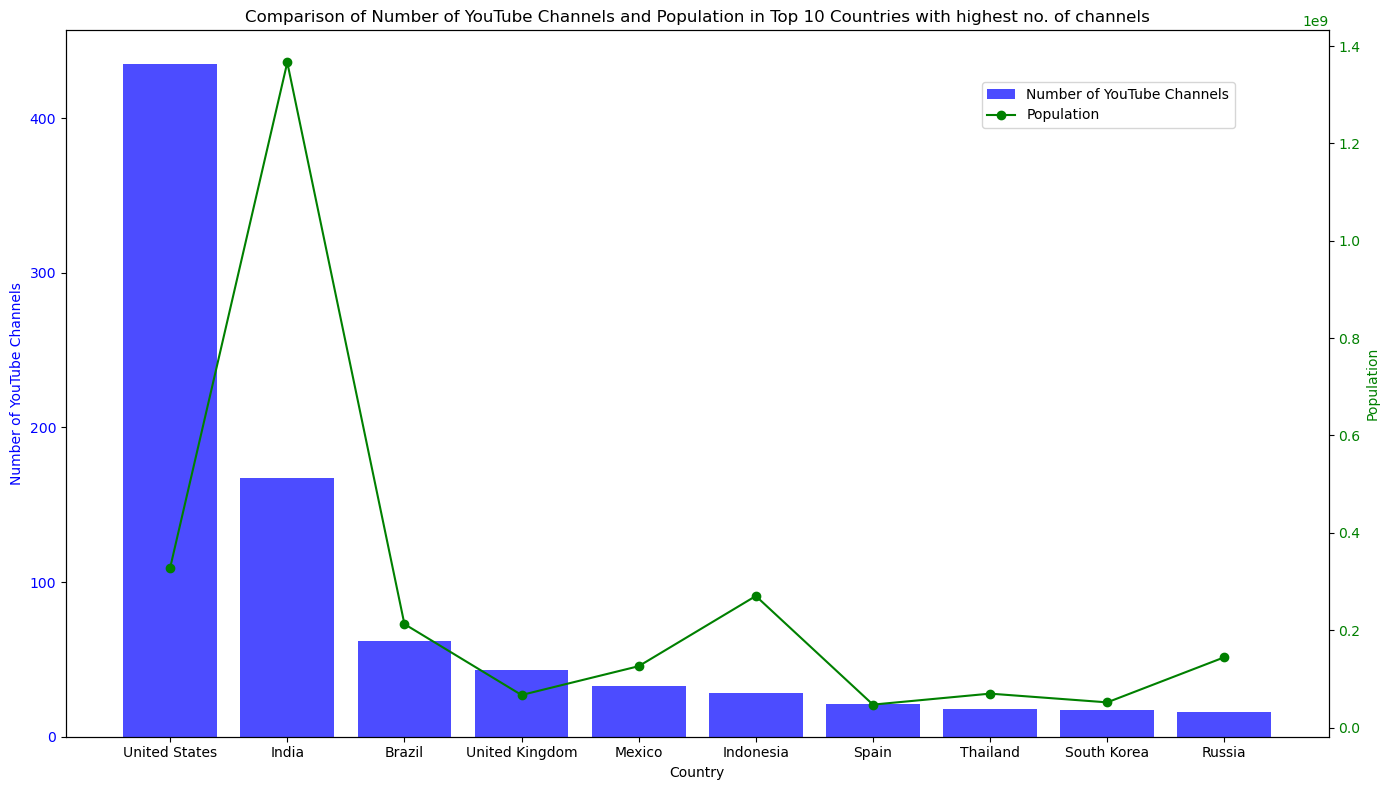

In [64]:
# Plotting the number of YouTube channels and population
fig, ax1 = plt.subplots(figsize=(14, 8))

# Bar plot for the number of YouTube channels
ax1.bar(result_df['Country'], result_df['Channel_Count'], color='b', alpha=0.7, label='Number of YouTube Channels')
ax1.set_xlabel('Country')
ax1.set_ylabel('Number of YouTube Channels', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis for the population
ax2 = ax1.twinx()
ax2.plot(result_df['Country'], result_df['Population'], color='g', marker='o', linestyle='-', label='Population')
ax2.set_ylabel('Population', color='g')
ax2.tick_params(axis='y', labelcolor='g')

# Adding title and legend
plt.title('Comparison of Number of YouTube Channels and Population in Top 10 Countries with highest no. of channels')
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.7,0.9))

plt.show()

In [65]:
# Q17.	Is there a correlation between the number of subscribers gained in the last 30 days and the unemployment rate in a country?
no_of_sub_30 = df.groupby('Country')['subscribers_for_last_30_days'].sum()
unemp_rate = df.groupby('Country')['Unemployment rate'].mean()
# print(no_of_sub_30)
# print(unemp_rate)
print(no_of_sub_30.corr(unemp_rate))

0.21139636814187898


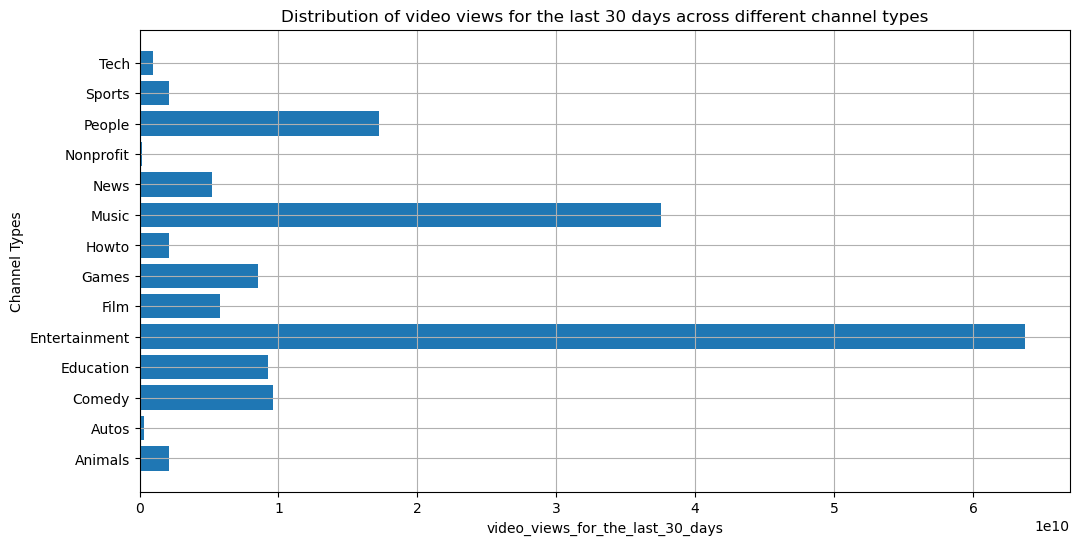

In [66]:
# Q18.	How does the distribution of video views for the last 30 days vary across different channel types?
video_views_last_30 = df.groupby('channel_type')['video_views_for_the_last_30_days'].sum()
# print(video_views_last_30)
channel_type = sorted(df['channel_type'].unique())
# print(channel_type)
plt.figure(figsize = (12,6))
plt.barh(channel_type, video_views_last_30)
plt.xlabel("video_views_for_the_last_30_days")
plt.ylabel("Channel Types")
plt.title("Distribution of video views for the last 30 days across different channel types")
plt.grid(True)
plt.show()

In [67]:
#Q19.	Are there any seasonal trends in the number of videos uploaded by YouTube channels?
# Create a mapping dictionary
# month_mapping = {
#     1:'Jan', 2:'Feb',3:'Mar',4:'Apr',
#     5:'May',6:'Jun',7:'Jul',8:'Aug',
#     9:'Sep',10:'Oct',11:'Nov',12:'Dec'
# }

# # Map the 'created_month' column
# df['created_month'] = df['created_month'].map(month_mapping)
print(df['created_month'])

0      Mar
1      Jan
2      Feb
3      Sep
4      Sep
5      Sep
6      May
7      Apr
8      Jan
9      Apr
10     Mar
11     May
12     Dec
13     Jun
14     Aug
15     Aug
16     Jul
17     Dec
18     Jan
19     Jan
20     Jun
21     Dec
22     Dec
23     Mar
24     Feb
25     Jun
26     Jun
27     Aug
28     Mar
29     Apr
30     May
31     Jun
32     Oct
33     Aug
34     Sep
35     Feb
36     Apr
37     Jun
38     Nov
39     Aug
40     Jun
41     Sep
42     Jan
43     Oct
44     May
45     Feb
46     Dec
47     Sep
48     Jul
49     Sep
50     Mar
51     Nov
52     May
53     Nov
54     May
55     Sep
56     Jan
57     Nov
58     Jun
59     Jan
60     Jul
61     May
62     May
63     Oct
64     May
65     Jul
66     Nov
67     Sep
68     Nov
69     Nov
70     Sep
71     Nov
72     Jun
73     Jun
74     Dec
75     Jun
76     Nov
77     Mar
78     Oct
79     Jun
80     Sep
81     Jul
82     Nov
83     Aug
84     Jun
85     May
86     Aug
87     Jun
88     Nov
89     May
90     May

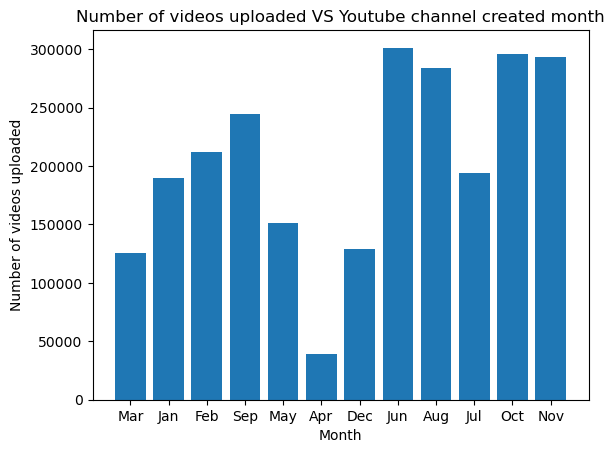

In [68]:
plt.bar(df['created_month'], df['uploads'])
plt.title("Number of videos uploaded VS Youtube channel created month")
plt.xlabel("Month")
plt.ylabel("Number of videos uploaded")
plt.show()

In [69]:
# Q20.	What is the average number of subscribers gained per month since the creation of YouTube channels till now?

# to change jan feb mar to 1 2 3
# Create a mapping dictionary
month_mapping = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4,
    'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8,
    'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}

# Map the 'created_month' column
df['created_month'] = df['created_month'].map(month_mapping)
print(df['created_month'])

0       3
1       1
2       2
3       9
4       9
5       9
6       5
7       4
8       1
9       4
10      3
11      5
12     12
13      6
14      8
15      8
16      7
17     12
18      1
19      1
20      6
21     12
22     12
23      3
24      2
25      6
26      6
27      8
28      3
29      4
30      5
31      6
32     10
33      8
34      9
35      2
36      4
37      6
38     11
39      8
40      6
41      9
42      1
43     10
44      5
45      2
46     12
47      9
48      7
49      9
50      3
51     11
52      5
53     11
54      5
55      9
56      1
57     11
58      6
59      1
60      7
61      5
62      5
63     10
64      5
65      7
66     11
67      9
68     11
69     11
70      9
71     11
72      6
73      6
74     12
75      6
76     11
77      3
78     10
79      6
80      9
81      7
82     11
83      8
84      6
85      5
86      8
87      6
88     11
89      5
90      5
91      7
92      4
93      1
94      3
95      6
96      9
97      9
98      3
99     10


In [70]:
from datetime import datetime
# Get the current date
current_date = pd.to_datetime(datetime.now().date())
print(current_date)

2024-07-11 00:00:00


In [71]:
df['month_since_creation1'] = df.apply(lambda x: (current_date.year - x['created_year'])*12, axis=1)
print(df['month_since_creation1'])

0      216.0
1      216.0
2      144.0
3      216.0
4      216.0
5      132.0
6      108.0
7      168.0
8       96.0
9       72.0
10     120.0
11     204.0
12     132.0
13      96.0
14     216.0
15     204.0
16      48.0
17     144.0
18     216.0
19     204.0
20     192.0
21     228.0
22     156.0
23     144.0
24     132.0
25     168.0
26     192.0
27      72.0
28     180.0
29     216.0
30     204.0
31     156.0
32     120.0
33     180.0
34     180.0
35     204.0
36     108.0
37     216.0
38      96.0
39     216.0
40     120.0
41     216.0
42     204.0
43     132.0
44     132.0
45     132.0
46     216.0
47     204.0
48     204.0
49     180.0
50     216.0
51     228.0
52     156.0
53      96.0
54     216.0
55     132.0
56     192.0
57     228.0
58     192.0
59     132.0
60     192.0
61     216.0
62      96.0
63     228.0
64     156.0
65      96.0
66     144.0
67     120.0
68      84.0
69     228.0
70     228.0
71      96.0
72     156.0
73     168.0
74     156.0
75      72.0
76      84.0

In [72]:
df['month_since_creation'] = df['created_month'] + df['month_since_creation1']
print(df['month_since_creation'])

0      219.0
1      217.0
2      146.0
3      225.0
4      225.0
5      141.0
6      113.0
7      172.0
8       97.0
9       76.0
10     123.0
11     209.0
12     144.0
13     102.0
14     224.0
15     212.0
16      55.0
17     156.0
18     217.0
19     205.0
20     198.0
21     240.0
22     168.0
23     147.0
24     134.0
25     174.0
26     198.0
27      80.0
28     183.0
29     220.0
30     209.0
31     162.0
32     130.0
33     188.0
34     189.0
35     206.0
36     112.0
37     222.0
38     107.0
39     224.0
40     126.0
41     225.0
42     205.0
43     142.0
44     137.0
45     134.0
46     228.0
47     213.0
48     211.0
49     189.0
50     219.0
51     239.0
52     161.0
53     107.0
54     221.0
55     141.0
56     193.0
57     239.0
58     198.0
59     133.0
60     199.0
61     221.0
62     101.0
63     238.0
64     161.0
65     103.0
66     155.0
67     129.0
68      95.0
69     239.0
70     237.0
71     107.0
72     162.0
73     174.0
74     168.0
75      78.0
76      95.0

Name: month_since_creation, dtype: float64


In [73]:
df['subscribers_per_month'] = df['subscribers'] / df['month_since_creation']
print(df['subscribers_per_month'])

0      1.118721e+06
1      7.834101e+05
2      1.136986e+06
3      7.200000e+05
4      7.066667e+05
5      8.439716e+05
6      9.911504e+05
7      6.453488e+05
8      1.092784e+06
9      1.301316e+06
10     7.861789e+05
11     4.593301e+05
12     6.500000e+05
13     8.803922e+05
14     3.879464e+05
15     3.915094e+05
16     1.456364e+06
17     4.846154e+05
18     3.456221e+05
19     3.492683e+05
20     3.601010e+05
21     2.937500e+05
22     4.059524e+05
23     4.523810e+05
24     4.917910e+05
25     3.770115e+05
26     3.262626e+05
27     7.625000e+05
28     3.251366e+05
29     2.704545e+05
30     2.837321e+05
31     3.604938e+05
32     4.461538e+05
33     3.063830e+05
34     3.026455e+05
35     2.762136e+05
36     5.035714e+05
37     2.459459e+05
38     5.046729e+05
39     2.388393e+05
40     4.230159e+05
41     2.351111e+05
42     2.570732e+05
43     3.676056e+05
44     3.510949e+05
45     3.574627e+05
46     2.083333e+05
47     2.225352e+05
48     2.218009e+05
49     2.465608e+05


In [74]:
avg_subcribers_per_month = df['subscribers_per_month'].mean()
print(avg_subcribers_per_month)

184875.1644867944
